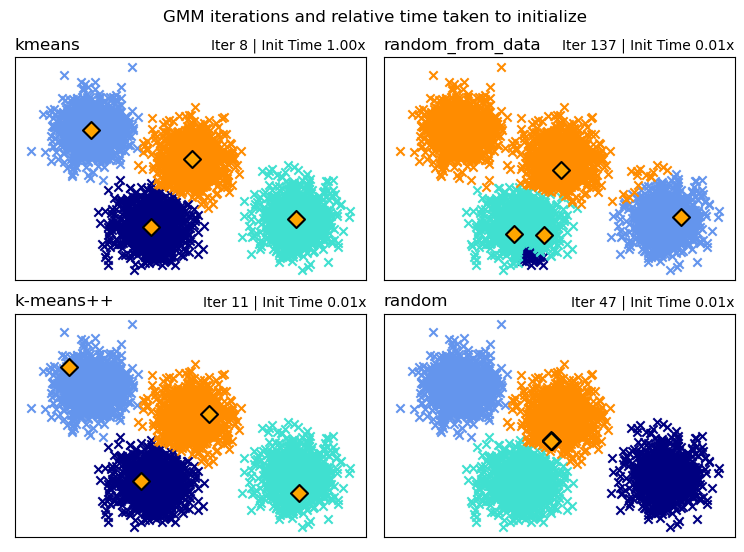

In [1]:
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets._samples_generator import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.utils.extmath import row_norms

# 生成模拟数据
# make_blobs用于生成聚类数据集， n_features默认为2
X, y_true = make_blobs(n_samples=4000, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1]  # 反转特征顺序

# 初始化一些参数
n_samples = 4000
n_components = 4
x_squared_norms = row_norms(X, squared=True)  # 计算数据点的平方范数

# 定义函数以获取GMM的初始均值
def get_initial_means(X, init_params, r):
    # 使用GaussianMixture获取初始化均值
    gmm = GaussianMixture(
        n_components=4, init_params=init_params, tol=1e-9, max_iter=0, random_state=r
    ).fit(X)
    return gmm.means_

# 定义初始化方法和相关配置
methods = ["kmeans", "random_from_data", "k-means++", "random"]
colors = ["navy", "turquoise", "cornflowerblue", "darkorange"]
times_init = {}  # 存储初始化时间
relative_times = {}  # 存储相对于第一种方法的初始化时间

# 设置绘图
plt.figure(figsize=(4 * len(methods) // 2, 6))
plt.subplots_adjust(bottom=0.1, top=0.9, hspace=0.15, wspace=0.05, left=0.05, right=0.95)

# 对于每种初始化方法
for n, method in enumerate(methods):
    r = np.random.RandomState(seed=1234)
    plt.subplot(2, len(methods) // 2, n + 1)

    # 记录初始化时间
    start = timer()
    ini = get_initial_means(X, method, r)
    end = timer()
    init_time = end - start

    # 应用GaussianMixture模型
    gmm = GaussianMixture(
        n_components=4, means_init=ini, tol=1e-9, max_iter=2000, random_state=r
    ).fit(X)

    # 保存和计算时间
    times_init[method] = init_time
    relative_times[method] = times_init[method] / times_init[methods[0]]

    # 绘制GMM的结果
    for i, color in enumerate(colors):
        data = X[gmm.predict(X) == i]
        plt.scatter(data[:, 0], data[:, 1], color=color, marker="x")

    plt.scatter(ini[:, 0], ini[:, 1], s=75, marker="D", c="orange", lw=1.5, edgecolors="black")
    plt.xticks(())
    plt.yticks(())
    plt.title(method, loc="left", fontsize=12)
    plt.title("Iter %i | Init Time %.2fx" % (gmm.n_iter_, relative_times[method]), loc="right", fontsize=10)

# 显示绘制的图形
plt.suptitle("GMM iterations and relative time taken to initialize")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
seed_value = 2023
np.random.seed(seed_value)